In [0]:
#!pip install geopandas

In [0]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def create_map(fp, data, NY = True):
  map_df = gpd.read_file(fp)
  if NY:    
    map_df = map_df[map_df["PO_NAME"] == "New York"]
    title = 'Fake Reviews in New York'
  else:
    map_df = map_df.rename(columns={"zip": "ZIPCODE"})
    title = 'Fake Reviews in Chicago'

  map_df['ZIPCODE'] = map_df['ZIPCODE'].astype('int64')

  variable = 'fake_ratio'
  merged_df = pd.merge(map_df, data, how='left', left_on='ZIPCODE', right_on='zipcode')
  merged_df[variable].fillna(0, inplace=True)
  
  vmin, vmax = 0, 1
  fig, ax = plt.subplots(1, figsize=(20, 12))
  merged_df.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
  ax.axis('off')

  ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})

  sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
  sm._A = []
  cbar = fig.colorbar(sm)

In [0]:
def get_data(NY=True):
  if NY:
    ny_data = pd.read_csv("flattened_data_New_York.csv")
    ny_data = ny_data[["zipcode", "label"]]
    ny_data['label'] = ny_data['label'].map({-1: 0, 1: 1})
    data = ny_data
  else:
    chi_data1 = pd.read_csv("chicago_flat_hotels.csv")
    chi_data2 = pd.read_csv("chicago_flat_restaurants.csv")
    chi_data = pd.concat([chi_data1, chi_data2])
    chi_data = chi_data[["zip_code", "label"]]
    chi_data = chi_data[chi_data.zip_code != "Oops!"]
    chi_data['label'] = chi_data['label'].map({'N': 0, 'Y': 1})
    chi_data = chi_data.rename(columns={"zip_code": "zipcode"})
    data = chi_data

  agg_data = data.groupby("zipcode").agg({'label': ['count','sum']}).reset_index()
  agg_data['fake_ratio'] = 1 - (agg_data['label']['sum']/agg_data['label']['count'])
  agg_data = agg_data[['zipcode', 'fake_ratio']]
  agg_data.columns = agg_data.columns.droplevel(1)

  return agg_data

In [0]:
ny_fp = '/content/ZIP_CODE_040114.shp'
chi_fp = '/content/geo_export_33c893de-4910-45c0-b0c5-f56cb85a4856.shp'

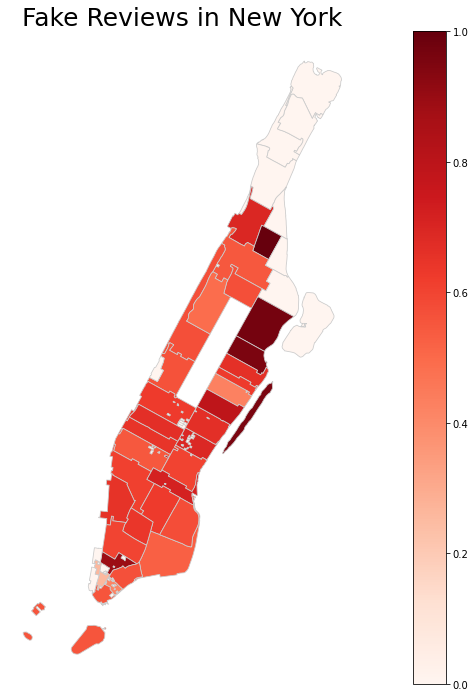

In [0]:
fp = ny_fp
NY = fp == ny_fp
data = get_data(NY)
create_map(fp, data, NY)

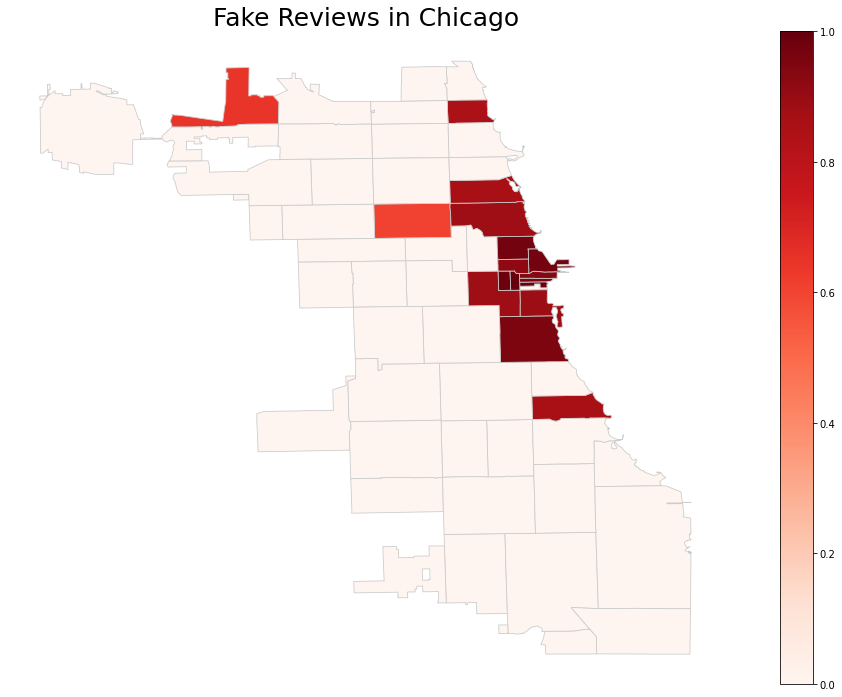

In [0]:
fp = chi_fp
NY = fp == ny_fp
data = get_data(NY)
create_map(fp, data, NY)